In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<span style="font-size:40px">
Importing the data

In [4]:
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\python\datasets\personality_datasert.csv")

In [5]:
data.shape

(2900, 8)

In [6]:
data.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


<span style="font-size:40px">
Data Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [8]:
#summary statistics for all numerical columns
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [9]:
#Number of Extroverts and Introverts in the dataset
data['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [10]:
#Check for missing values
pd.isnull(data).sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

<span style="font-size:40px">
Exploratory Data Analysis (EDA) with Visualizations

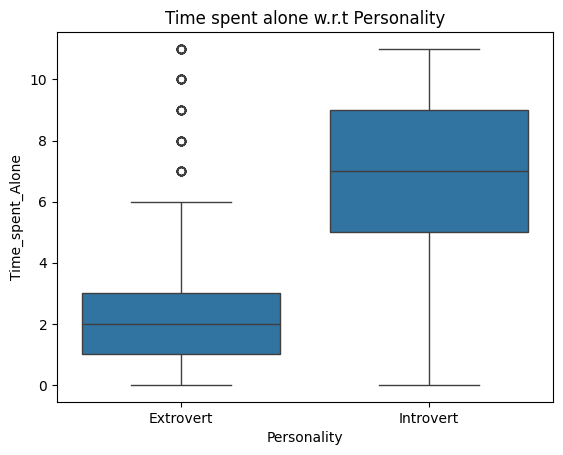

In [11]:
#Boxplot for Time_spent_Alone by Personality
sns.boxplot(data = data, y = 'Time_spent_Alone', x = 'Personality')
plt.title('Time spent alone w.r.t Personality')
plt.show()

<span style="font-size:30px">
1. From the boxplot we can clearly see that introverts spend more time alone. 

2. Although there are also some exceptions or outliers which show that very few extroverts also like spending more time alone.

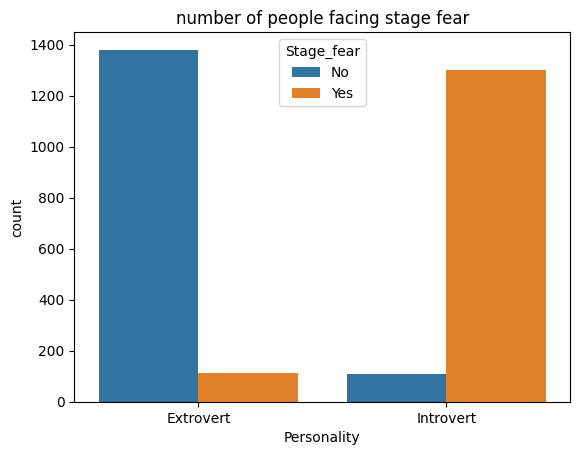

In [12]:
#Countplot for number of people facing stage fear
sns.countplot(data = data, x = 'Personality',hue = 'Stage_fear') 

plt.title('number of people facing stage fear')
plt.xlabel('Personality')
plt.show()

<span style="font-size:30px">
Extroverts experience less stage fear than the introverts

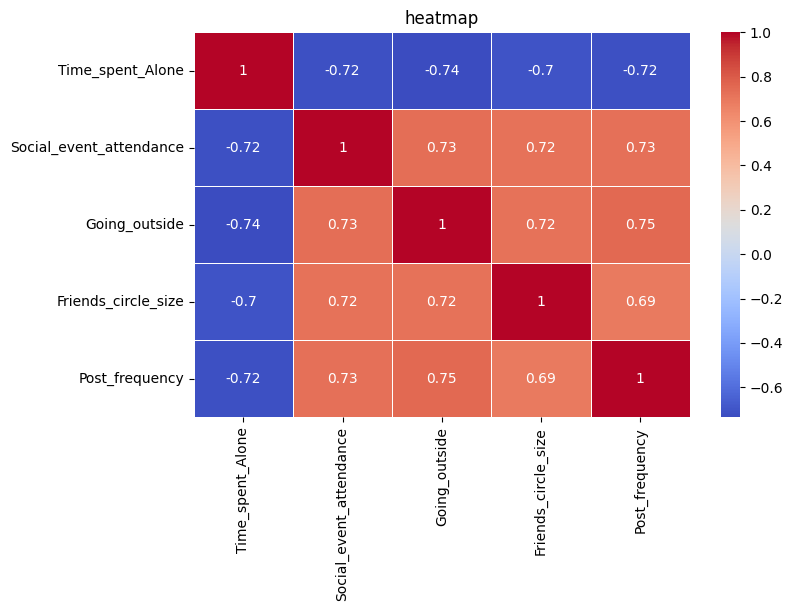

In [13]:
columns = data[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]
relation = columns.corr()
plt.figure(figsize= (8,5))
sns.heatmap(relation, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title("heatmap")
plt.show()

<span style="font-size:30px">
1. The more time someone spends alone, the less socially active they are.
2. People who attend more social events are know to have larger friend circle and they post more frequently, showing extrovert traits.
3. People with larger friend circle tend are extroverts.

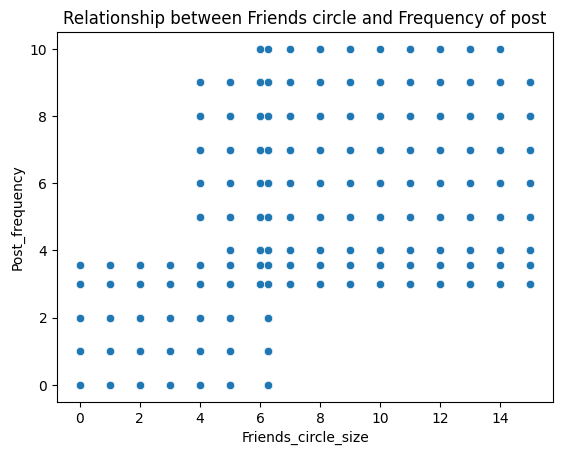

In [14]:
sns.scatterplot(data = data, x ='Friends_circle_size', y ='Post_frequency')
plt.title('Relationship between Friends circle and Frequency of post')
plt.show()

<span style="font-size:30px">
People with large friend circle tend to post more on social media

<span style="font-size:40px">
Data Preprocessing

In [15]:
data['Stage_fear'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
data['Stage_fear']= data['Stage_fear'].map({'Yes': 1, 'No': 0})

In [17]:
data['Drained_after_socializing'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes':1, 'No':0})

In [19]:
data['Personality'].unique()

array(['Extrovert', 'Introvert'], dtype=object)

In [20]:
data['Personality'] = data['Personality'].map({'Extrovert': 1, 'Introvert': 0})

In [21]:
data.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [22]:
#Split data into features (X) and target (y)
x = data[['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
          'Going_outside', 'Drained_after_socializing', 
          'Friends_circle_size', 'Post_frequency']]
y = data ['Personality']

In [23]:
x

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0
2896,3.0,0,8.0,3.0,0,14.0,9.0
2897,4.0,1,1.0,1.0,1,4.0,0.0
2898,11.0,1,1.0,3.0,1,2.0,0.0


In [24]:
y

0       1
1       0
2       0
3       1
4       1
       ..
2895    1
2896    1
2897    0
2898    0
2899    1
Name: Personality, Length: 2900, dtype: int64

In [25]:
# Split into train and test sets (80/20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [26]:
#Standardize numerical features
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                    'Friends_circle_size', 'Post_frequency']
standardization = StandardScaler()
x_train[numeric_columns] = standardization.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = standardization.fit_transform(x_test[numeric_columns])



In [27]:
x_train[numeric_columns].head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
2078,-0.437476,0.363759,1.348934,0.889367,1.876505
163,0.434649,-0.332327,-0.001941,-1.242188,-1.229353
1938,1.597482,-0.680371,-0.452233,-1.242188,-1.229353
252,1.306774,-1.028414,-0.452233,-0.768509,-0.884258
2232,1.597482,-1.376457,-1.352816,-0.531669,-0.884258


In [28]:
x_test[numeric_columns].head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
141,1.594445,-0.347829,0.007756,-0.319844,-0.199767
1557,-0.001109,-0.011870,0.907500,1.789161,0.496044
485,0.142406,-1.394043,-1.341860,-1.491513,-0.547673
1712,1.594445,-0.696567,-0.442116,-1.022845,-0.895578
2250,0.723222,-1.394043,-1.341860,-1.022845,-0.895578


<span style="font-size:60px">
Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
 
prediction = model.predict(x_test)

In [30]:
from sklearn.metrics import classification_report
print('\nClassification Report:\n', classification_report(y_test, prediction))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.93      0.92      0.93       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



<span style="font-size:60px">
Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(random_state = 42)
model2.fit(x_train, y_train)
prediction_2 = model2.predict(x_test)

In [32]:
print("\n Random Forest Classification Report:\n")
print(classification_report(y_test, prediction_2))


 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.94      0.91      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



<span style="font-size:40px">
Model Evaluation

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
logistic_probability = model.predict_proba(x_test)[:, 1]
random_forest_probability = model2.predict_proba(x_test)[:, 1]

In [34]:
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probability)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probability)

In [35]:
logistic_auc = auc(logistic_fpr, logistic_tpr)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

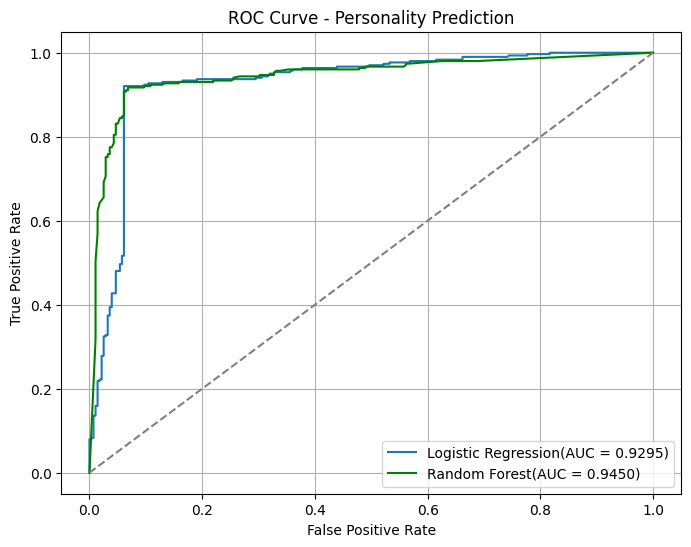

In [36]:
plt.figure(figsize = (8,6))
plt.plot(logistic_fpr, logistic_tpr, label = f'Logistic Regression(AUC = {logistic_auc:.4f})')
plt.plot(random_forest_fpr, random_forest_tpr, label=f'Random Forest(AUC = {random_forest_auc:.4f})', color = 'green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Personality Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [37]:

# Calculate AUC scores
logistic_auc = auc(logistic_fpr, logistic_tpr)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

print(f"Logistic Regression AUC: {logistic_auc:.4f}")
print(f"Random Forest AUC: {random_forest_auc:.4f}")

Logistic Regression AUC: 0.9295
Random Forest AUC: 0.9450


# Since the AUC Score of Random Forest Algorithm is more than Logistic Regression therefore Random forest gives better results.

<span style="font-size:40px">
Plotting Important features

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5304\2864447436.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=important_data, x='Importance', y='Feature', palette='viridis')


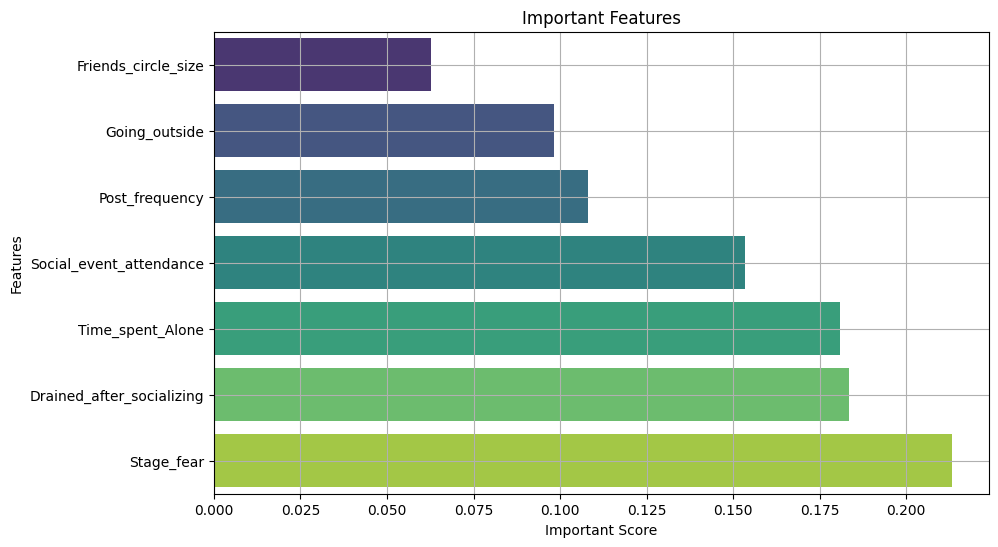

In [38]:
important = model2.feature_importances_
features = x.columns
important_data = pd.DataFrame({'Feature': features, 'Importance': important}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=important_data, x='Importance', y='Feature', palette='viridis')
plt.title('Important Features')
plt.xlabel('Important Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()

<span style="font-size:30px">
Conclusion
The most important features were Drained_after_socializing, Stage_fear, Time_spent_Alone:

1. It is because it reflects the behaviour of introvert and extrovert. 
2. An introvert feels exhausetd after socializing and therefore they like spending more alone time. 
3. On the other hand, extroverts feel much more happier when they interact with more people and consider spending less time alone.
